In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()

In [2]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_row", 160)
pd.set_option('max_colwidth', 200)

In [3]:
a = pd.read_csv('../Data/accepted.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
a = a.assign(FICO = (a['fico_range_low'] + a['fico_range_high'])/2)

In [5]:
a[['FICO']].describe()

,FICO
count,2.260668e+06
mean,7.005883e+02
std,3.301081e+01
min,6.120000e+02
25%,6.770000e+02
50%,6.920000e+02
75%,7.170000e+02
max,8.475000e+02


<Figure size 576x288 with 0 Axes>

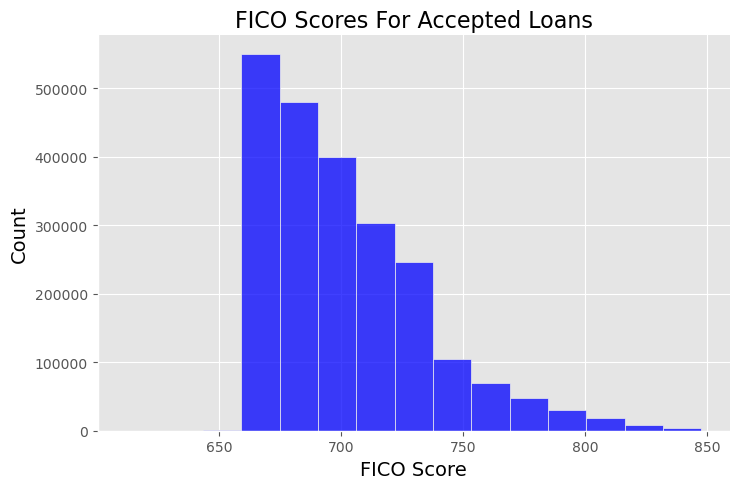

In [6]:
plt.figure(figsize=(8,4))
plt.style.use('default')
plt.style.use('ggplot')

sns.displot(data=a, x='FICO', kind='hist', bins=15, color = 'blue', aspect=1.5)

plt.title('FICO Scores For Accepted Loans', fontsize=16, color='black')
plt.xlabel('FICO Score', fontsize=14, color='black')
plt.ylabel('Count', fontsize=14, color='black')
#plt.legend(fontsize=12)

plt.tight_layout()
plt.show();

In [7]:
a = a[(a.fico_range_low>=660)&(a.fico_range_low<=840)]

In [8]:
a.shape

(2259738, 152)

In [9]:
a[['fico_range_low', 'FICO']].describe()

,fico_range_low,FICO
count,2.259738e+06,2.259738e+06
mean,6.985707e+02,7.005707e+02
std,3.294495e+01,3.294495e+01
min,6.600000e+02,6.620000e+02
25%,6.750000e+02,6.770000e+02
50%,6.900000e+02,6.920000e+02
75%,7.150000e+02,7.170000e+02
max,8.400000e+02,8.420000e+02


<Figure size 1000x600 with 0 Axes>

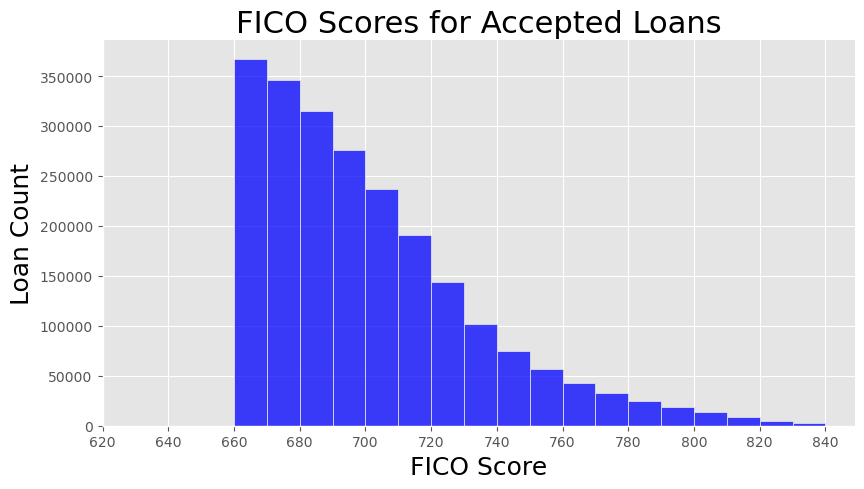

In [10]:
plt.figure(figsize=(10,6))
plt.style.use('default')
plt.style.use('ggplot')

p = sns.displot(data=a, x='fico_range_low', kind='hist', color='blue',
                bins=18, aspect=1.75)

p.set(xticks=np.arange(620,850,20))

plt.title('FICO Scores for Accepted Loans', fontsize=22, color='black')
plt.xlabel('FICO Score', fontsize=18, color='black')
plt.ylabel('Loan Count', fontsize=18, color='black')

#plt.legend(loc='center right', fontsize=15)

#handles, labels = p.get_legend_handles_labels()
#p.legend(handles=handles[1:], labels=labels[1:])

#sns.move_legend(obj=p, loc='center right', fontsize=15, title_fontsize=15)

plt.tight_layout()
plt.show();

In [11]:
c = pd.read_csv('../Data/Combo_4_Full.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
c.shape

(29909405, 5)

In [13]:
c.dtypes

Risk_Score            object
DI                   float64
Loan Type             object
Employment Length     object
Accepted               int64
dtype: object

In [14]:
c['Risk_Score'].value_counts()

None     18497630
662.0      183651
672.0      179311
501.0      178456
667.0      177983
           ...   
318.0           4
612.0           2
627.0           2
622.0           1
617.0           1
Name: Risk_Score, Length: 742, dtype: int64

In [15]:
29909405 - 18497630

11411775

In [16]:
c['Accepted'].value_counts()

0    27648741
1     2260664
Name: Accepted, dtype: int64

In [17]:
c_new = c[['Risk_Score', 'Accepted']].mask(c.eq('None')).dropna()
c_new

,Risk_Score,Accepted
0,677.0,1
1,717.0,1
2,697.0,1
3,787.0,1
4,697.0,1
...,...,...
29909397,681.0,0
29909398,531.0,0
29909400,590.0,0
29909402,686.0,0


In [18]:
cols = c_new.columns
c_new[cols] = c_new[cols].apply(pd.to_numeric)
c_new.dtypes

Risk_Score    float64
Accepted        int64
dtype: object

In [19]:
c_new['Application'] = c_new['Accepted'].map({0:'Rejected', 1:'Accepted'})

In [20]:
c_new

,Risk_Score,Accepted,Application
0,677.0,1,Accepted
1,717.0,1,Accepted
2,697.0,1,Accepted
3,787.0,1,Accepted
4,697.0,1,Accepted
...,...,...,...
29909397,681.0,0,Rejected
29909398,531.0,0,Rejected
29909400,590.0,0,Rejected
29909402,686.0,0,Rejected


In [21]:
c_new = c_new[(c_new.Risk_Score >= 400)&(c_new.Risk_Score<=990)]

<Figure size 1000x600 with 0 Axes>

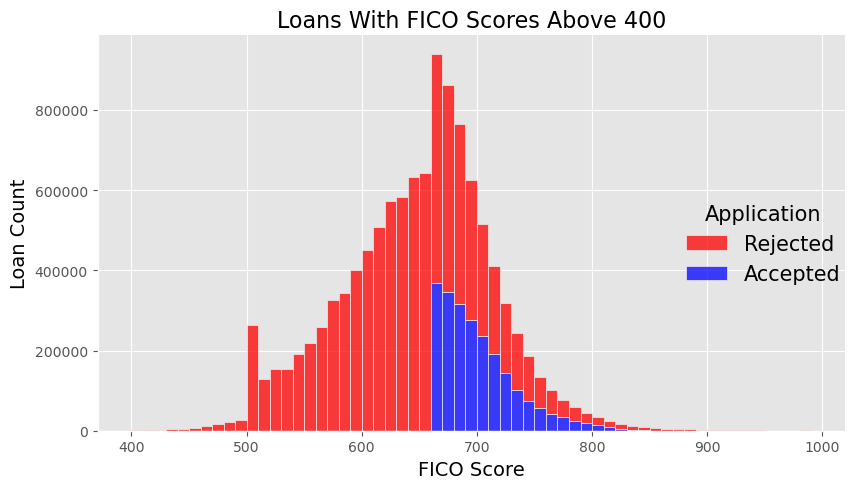

In [22]:
plt.figure(figsize=(10,6))
plt.style.use('default')
plt.style.use('ggplot')

p = sns.displot(data=c_new, x='Risk_Score', kind='hist', hue='Application',
            hue_order=['Rejected', 'Accepted'],
            multiple='stack', bins=59, aspect=1.5, 
            palette={'Accepted':'blue', 'Rejected':'red'})

p.set(xticks=np.arange(400,1100,100))

plt.title('Loans With FICO Scores Above 400', fontsize=16, color='black')
plt.xlabel('FICO Score', fontsize=14, color='black')
plt.ylabel('Loan Count', fontsize=14, color='black')
#plt.legend(fontsize=12)

sns.move_legend(obj=p, loc='center right', fontsize=15, title_fontsize=15)

plt.tight_layout()
plt.show();

In [23]:
c_new.describe()

,Risk_Score,Accepted
count,1.132261e+07,1.132261e+07
mean,6.475016e+02,1.996593e-01
std,6.624946e+01,3.997443e-01
min,4.000000e+02,0.000000e+00
25%,6.060000e+02,0.000000e+00
50%,6.550000e+02,0.000000e+00
75%,6.900000e+02,0.000000e+00
max,9.900000e+02,1.000000e+00


In [24]:
c_new = c_new[c_new.Risk_Score <= 800]
c_new

,Risk_Score,Accepted,Application
0,677.0,1,Accepted
1,717.0,1,Accepted
2,697.0,1,Accepted
3,787.0,1,Accepted
4,697.0,1,Accepted
...,...,...,...
29909397,681.0,0,Rejected
29909398,531.0,0,Rejected
29909400,590.0,0,Rejected
29909402,686.0,0,Rejected


<Figure size 800x400 with 0 Axes>

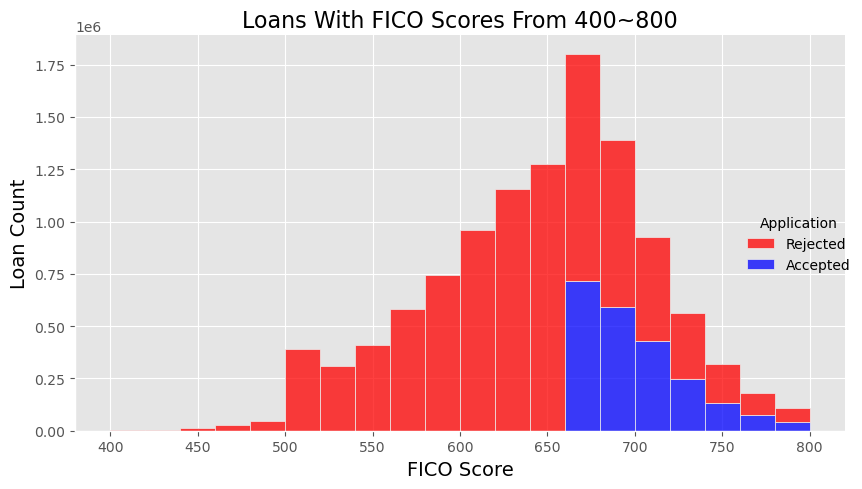

In [25]:
plt.figure(figsize=(8,4))
plt.style.use('default')
plt.style.use('ggplot')

sns.displot(data=c_new, x='Risk_Score', kind='hist', hue='Application',
            hue_order=['Rejected', 'Accepted'],
            multiple='stack', bins=20, aspect=1.5, 
            palette={'Accepted':'blue', 'Rejected':'red'})

plt.title('Loans With FICO Scores From 400~800', fontsize=16, color='black')
plt.xlabel('FICO Score', fontsize=14, color='black')
plt.ylabel('Loan Count', fontsize=14, color='black')
#plt.legend(fontsize=12)

plt.tight_layout()
plt.show();

In [26]:
c_new = c_new[c_new.Risk_Score >= 600]
c_new

,Risk_Score,Accepted,Application
0,677.0,1,Accepted
1,717.0,1,Accepted
2,697.0,1,Accepted
3,787.0,1,Accepted
4,697.0,1,Accepted
...,...,...,...
29909393,730.0,0,Rejected
29909396,678.0,0,Rejected
29909397,681.0,0,Rejected
29909402,686.0,0,Rejected


<Figure size 1000x600 with 0 Axes>

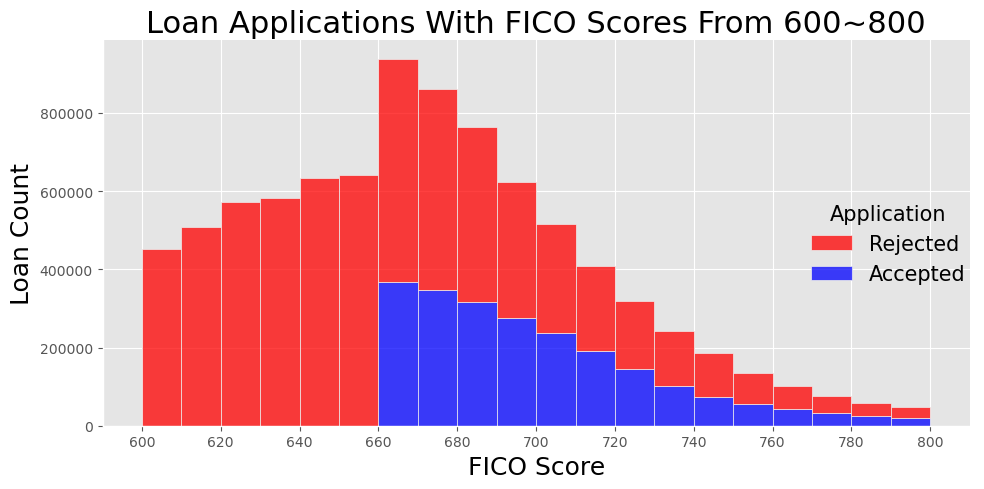

In [27]:
plt.figure(figsize=(10,6))
plt.style.use('default')
plt.style.use('ggplot')

p = sns.displot(data=c_new, x='Risk_Score', kind='hist', hue='Application',
            hue_order=['Rejected', 'Accepted'],
            multiple='stack', bins=20, aspect=1.75, 
            palette={'Accepted':'blue', 'Rejected':'red'})

p.set(xticks=np.arange(600,810,20))

plt.title('Loan Applications With FICO Scores From 600~800', fontsize=22, color='black')
plt.xlabel('FICO Score', fontsize=18, color='black')
plt.ylabel('Loan Count', fontsize=18, color='black')

#plt.legend(loc='center right', fontsize=15)

#handles, labels = p.get_legend_handles_labels()
#p.legend(handles=handles[1:], labels=labels[1:])

sns.move_legend(obj=p, loc='center right', fontsize=15, title_fontsize=15)

plt.tight_layout()
plt.show();

In [28]:
c_new[(c_new.Risk_Score>=660)&(c_new.Risk_Score<670)].describe()

,Risk_Score,Accepted
count,938845.000000,938845.000000
mean,664.441008,0.391267
std,2.730072,0.488034
min,660.000000,0.000000
25%,662.000000,0.000000
50%,664.000000,0.000000
75%,667.000000,1.000000
max,669.000000,1.000000


In [29]:
c_new[(c_new.Risk_Score>=660)&(c_new.Risk_Score<670)].groupby('Accepted').count()

,Risk_Score,Application
Accepted,,
0,571506,571506
1,367339,367339


In [30]:
367339/938845

0.39126692904579563

In [31]:
c_new[(c_new.Risk_Score>=670)&(c_new.Risk_Score<680)].describe()

,Risk_Score,Accepted
count,861312.000000,861312.000000
mean,674.363332,0.401869
std,2.724183,0.490276
min,670.000000,0.000000
25%,672.000000,0.000000
50%,674.000000,0.000000
75%,677.000000,1.000000
max,679.000000,1.000000


In [32]:
c_new[(c_new.Risk_Score>=670)&(c_new.Risk_Score<680)].groupby('Accepted').count()

,Risk_Score,Application
Accepted,,
0,515177,515177
1,346135,346135


In [33]:
346135/861312

0.40186947354733243